# Getting Started with Brightway2

This is an introduction to Brightway2, an open source framework for Life Cycle Assessment. This notebook will cover the basics of databases and activities and looking at LCI databases and LCIA methods.

At the end of this notebook, you will be able to:

* Import basic data like the biosphere database
* Import and explore the [FORWAST](http://forwast.brgm.fr/) database

If you finish the notebook, you get a kitten.

This introduction is written in an Jupyter notebook, an online scientific notebook which combines, text, data, images, and programming. It is amazing, and could be a fantastic way to do and communicate advanced LCA work. See the [documentation](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) and a list of [awesome examples](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks). Please see the [Brightway2 documentation](https://docs.brightwaylca.org) for a complete list of [example Brightway2 notebooks](https://docs.brightwaylca.org).

You should **download this notebook** and run it cell by cell - don't just read it on the web!

# Starting at the beginning

Import brightway2.

In [1]:
from brightway2 import *

If you get a warning like `Warning: bad escape \s`, don't worry! You can just ignore it. It is coming from an imported dependency.

## Python 2 and 3

Brightway2 is compatible with both Python 2 and 3. If you are using Python 2, I strongly recommend you execute the following cell, which will make all your text string unicode without have to type the letter ``"u"`` in front of each text string. On Python 3, the following **doesn't do anything** - your text strings are unicode by default.

I won't include this cell in future notebooks, but you should copy and paste it if you will use Python 2.

In [2]:
from __future__ import unicode_literals, print_function

## Projects

In Brightway2, a project is a separate directory with its own copies of LCI databases, LCIA methods, and any other data you use. Each research project or article should probably be its own project, so that any changes you want to make will not interfere with your other work.

The default project is called ``default``:

In [3]:
projects.current

'default'

Each project is stored in a separate directory in a place in your filesystem reserved for application data. It varies depending on the operating system; on OS X, this is the `Library` directory in your user home directory:

In [4]:
projects.dir

'/Users/cmutel/Library/Application Support/Brightway3/default.c21f969b5f03d33d43e04f8f136e7682'

However, you really need to care about the specifics. 

We can create a new project:

In [5]:
projects.set_current("BW2 introduction")

And list the available projects:

In [6]:
projects

Brightway2 projects manager with 34 objects, including:
	1
	3.2
	7
	8
	BW2 Tutorial 1
	BW2 Tutorial 4
	BW2 introduction
	CAES
	Class 2
	Class 3
Use `sorted(projects)` to get full list, `projects.report()` to get
	a report on all projects.

## Getting basic data

Let's import some basic data - a database of elementary flows, some LCIA methods, and some metadata used for importing other databases:

In [7]:
bw2setup()

Creating default biosphere



Writing activities to SQLite3 database:
0%                          100%
[#######                       ] | ETA: 00:00:00

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applied 2 strategies in 0.01 seconds


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 07/15/2016 10:26:06
  Finished: 07/15/2016 10:26:07
  Total time elapsed: 00:00:00
  CPU %: 94.70
  Memory %: 1.64
Created database: biosphere3
Creating default LCIA methods

Applying strategy: normalize_units
Applying strategy: set_biosphere_type
Applying strategy: drop_unspecified_subcategories
Applying strategy: link_iterable_by_fields
Applied 4 strategies in 2.02 seconds
Wrote 665 LCIA methods with 169551 characterization factors
Creating core data migrations



The iPython notebook by default prints all logged messages. On your machine, there might be messages tracking how long it took to download and process the biosphere and methods packages.

## A biosphere dataset

The ``biosphere3`` database was installed. It is called the ``biosphere3`` database because elementary flow names are normalized to the ecoinvent 3 standard.

Let's see how many flows there are in this database, and then look at one random flow:

In [8]:
db = Database("biosphere3")
print("Number of flows in `biosphere3`:", len(db))
random_flow = db.random()
print(random_flow)

Number of flows in `biosphere3`: 4018
'Trimethylamine' (kilogram, None, ('water', 'ground-, long-term'))


In [9]:
print(random_flow['name'])
print(random_flow['unit'])
print(random_flow['categories'])

Trimethylamine
kilogram
('water', 'ground-, long-term')


Brightway2 uses keys to identify datasets. Each dataset is identified by a combination of its database and some unique code. The code can be anything - a number, a UUID, or just a name. All of the following would be valid keys:

    ("biosphere", "f66d00944691d54d6b072310b6f9de37")
    ("my new database", "building my dream house")
    ("skynet", 14832)

In [10]:
random_flow.key

('biosphere3', '6eebb3c4-306f-4dc4-afb1-2c8fdf0c64ff')

## An LCIA method dataset

We also installed a large number of LCIA methods:

In [11]:
len(methods)

665

Because LCIA methods have many different impact categories, they are identified not by a single label, but by a list of labels. Let's look at an example:

In [12]:
method_key = methods.random()
method_key

('eco-indicator 99, (H,A)', 'human health', 'climate change')

In this case, the LCIA method has three levels of specificity, from the general name (first level) to the specific impact category (last level). There is nothing magic about three levels - you could have one, or one hundred - but Brightway2 expects that LCIA methods will be a list of text labels ``('like', 'this')``.

Note that method identifiers need to be a special kind of list that uses `()` instead of `[]`. These are called `tuples`. To create a tuple with only one element, you need to add a comma, to distinguish it from a set of parentheses:

In [13]:
print (1 + 2)           # This is not a tuple
print (1,), type((1,))  # This is a tuple with one element

3
1


(None, tuple)

We can load the method data, show a sample.

Method data has the format:

    biosphere flow, numeric value, location

Where:

* `biosphere flow` is a dataset from any database which is used as a biosphere flow.
* `numeric value` can be either a fixed number or an uncertainty distribution.
* `location` is optional; the default value is that this characterization factor is valid everywhere.

The method data format is pretty flexible, and the following are all acceptable:

    [('biosphere', 'CO2'), 1.0],                                             # Default location
    [('biosphere', 'CO2'), 1.0, 'Australia, mate!'],                         # Custom location
    [('biosphere', 'CO2'), 1.0, ('Population density', 'Raster cell 4,2')],  # Location inside a geocollection
    [('biosphere', 'CO2'), {'amount': 1.0, 'uncertainty type': 0}],          # Uncertain characterization factor

[Geocollections](http://brightway2-regional.readthedocs.org/#spatial-scales-geocollections) are needed for regionalized LCA.

If you are wondering why we need to identify biosphere flows like `('biosphere', '2fe885840cebfcc7d56b607b0acd9359')`, this is a good question! The short answer is that there is no single field that uniquely identifies biosphere flows or activities. The longer answer [is in the manual](http://brightway2.readthedocs.org/en/latest/lci.html#uniquely-identifying-datasets).

Brightway2 is designed to be flexible enough for many different problems. Therefore, there are no limits on what constitutes a biosphere flow. Rather, anything that is linked to in a biosphere exchange will be put in the biosphere matrix. We installed a database called `biosphere3`, but you can define new flows in a database alongside process datasets, or create your own biosphere database.

In [14]:
method_data = Method(method_key).load()
print("Number of CFs:", len(method_data))
method_data[:20]

Number of CFs: 175


[(('biosphere3', 'f4a1e10b-ed51-433e-a2f5-2a99f231a5e5'), 0.016327),
 (('biosphere3', '66ff5d22-17e2-4112-b486-3ea4e0191fba'), 0.016327),
 (('biosphere3', 'fa5512cf-04a2-4014-8e96-d3e2d137f0df'), 0.016327),
 (('biosphere3', '982b0510-96ac-4bcb-a758-e98006b95f4d'), 0.016327),
 (('biosphere3', '892f10da-7bf2-42b3-b171-221989661a05'), 0.016327),
 (('biosphere3', 'e259263c-d1f1-449f-bb9b-73c6d0a32a00'), 0.0054545),
 (('biosphere3', '16eeda8a-1ea2-408e-ab37-2648495058dd'), 0.0054545),
 (('biosphere3', 'aa7cac3a-3625-41d4-bc54-33e2cf11ec46'), 0.0054545),
 (('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e'), 0.0054545),
 (('biosphere3', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9'), 0.0054545),
 (('biosphere3', 'e1c597cc-14cb-4ebb-af07-7a93a5b77d34'), 0.0054545),
 (('biosphere3', '6d89125e-e9b7-4d7e-a1fc-ada45dbd8815'), 0.0054545),
 (('biosphere3', '78eb1859-abd9-44c6-9ce3-f3b5b33d619c'), 0.0054545),
 (('biosphere3', 'e4e9febc-07c1-403d-8d3a-6707bb4d96e6'), 0.0054545),
 (('biosphere3', 'e8787b5

# Importing the FORWAST LCI database

We will use the FORWAST database, as it is both a high quality, comprehensive LCI database, and freely available. [FORWAST](http://forwast.brgm.fr/Overview.asp) is a physical MRIO table for Europe. It can be downloaded directly from the [2.-0 website](http://lca-net.com/projects/show/forwast/).

The following cell will download and install the FORWAST database. Note that an internet connection is required.

In [15]:
import zipfile
import os
from bw2data.utils import download_file

filepath = download_file("forwast.bw2package.zip", url="http://lca-net.com/wp-content/uploads/")
dirpath = os.path.dirname(filepath)
zipfile.ZipFile(filepath).extractall(dirpath)
BW2Package.import_file(os.path.join(dirpath, "forwast.bw2package"))

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:05


Title: Writing activities to SQLite3 database:
  Started: 07/15/2016 10:27:34
  Finished: 07/15/2016 10:27:39
  Total time elapsed: 00:00:05
  CPU %: 86.20
  Memory %: 3.53


[Brightway2 SQLiteBackend: forwast]

# Searching datasets

By default, every database is added to a search engine powered by [Whoosh](https://bitbucket.org/mchaput/whoosh/wiki/Home). Searching covers the following data fields:
* `name`
* `comment`
* `product`
* `categories`
* `location`

Searching is done by using the `Database.search` method.

In [16]:
Database("forwast").search("food")

['_26 Food preparations n.e.c., DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']),
 '_26 Food preparations n.e.c., EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']),
 '_92 Waste treatment, Incineration of waste, Food, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']),
 '112 Waste treatment, Composting of food waste, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']),
 '109 Waste treatment, Biogasification of food waste, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']),
 '103 Waste treatment, Composting of food waste, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']),
 '100 Waste treatment, Biogasification of food waste, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']),
 '101 Waste treatment, Incineration of waste, Food, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']),
 '116 Waste treatment, Landfill of waste, Food, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']),
 '107 Waste treatment, Landfill of waste, Food, DK' (kilogram, GLO, ['Input Output', 'De

Searches can also be filtered (where only the results that meet the specified criteria are *included*) or masked (where results that meet the specified criteria are *excluded*).

By default we return 25 search results, but this can be changed by specifying the `limit` keyword argument.

You can also use `*` wild cards in search queries:

In [17]:
Database("biosphere3").search("carb*", limit=10)

['Lithium carbonate' (kilogram, None, ('air',)),
 'Carbon-14' (kilo Becquerel, None, ('water', 'surface water')),
 'Carbon monoxide, from soil or biomass stock' (kilogram, None, ('air', 'low population density, long-term')),
 'TOC, Total Organic Carbon' (kilogram, None, ('water', 'surface water')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbaryl' (kilogram, None, ('water', 'surface water')),
 'Carbon-14' (kilo Becquerel, None, ('air', 'non-urban air or from high stacks')),
 'Carbon monoxide, non-fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil',)),
 'Carbonate' (kilogram, None, ('water', 'surface water'))]

You can specify inclusion or exclusion criteria for fields with `filter` and `mask`:

In [18]:
Database("biosphere3").search("carbon", filter={"categories": 'forestry'})

Excluding 77 filtered results


['Carbon' (kilogram, None, ('soil', 'forestry')),
 'Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil', 'forestry'))]

In [19]:
Database("biosphere3").search("carbon", limit=10, mask={"categories": 'forestry'})

Excluding 2 filtered results


['Carbon' (kilogram, None, ('soil', 'agricultural')),
 'Carbon' (kilogram, None, ('soil',)),
 'Carbon' (kilogram, None, ('soil', 'industrial')),
 'Carbon-14' (kilo Becquerel, None, ('water', 'surface water')),
 'Carbon-14' (kilo Becquerel, None, ('air', 'non-urban air or from high stacks')),
 'Carbon-14' (kilo Becquerel, None, ('air', 'urban air close to ground')),
 'Carbon disulfide' (kilogram, None, ('water', 'ground-')),
 'Carbon-14' (kilo Becquerel, None, ('water', 'ground-')),
 'Carbon disulfide' (kilogram, None, ('water', 'ocean')),
 'Elemental carbon' (kilogram, None, ('air', 'urban air close to ground'))]

Finally, you can facet search results by another field. This is a bit complicated, so test your queries before assuming certain behaviour.

In [20]:
sr = Database("biosphere3").search("carbon", facet="categories")
for key, value in sr.items():
    print("Facet term:", key, "\n\t", value[:3], "\n")

Facet term: term 
	 ['Carbon-14' (kilo Becquerel, None, ('air', 'low population density, long-term')), 'Carbon disulfide' (kilogram, None, ('air', 'low population density, long-term')), 'Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term'))] 

Facet term: urban 
	 ['Carbon-14' (kilo Becquerel, None, ('air', 'non-urban air or from high stacks')), 'Carbon-14' (kilo Becquerel, None, ('air', 'urban air close to ground')), 'Elemental carbon' (kilogram, None, ('air', 'urban air close to ground'))] 

Facet term: water 
	 ['Carbon-14' (kilo Becquerel, None, ('water', 'surface water')), 'Carbon disulfide' (kilogram, None, ('water', 'ground-')), 'Carbon-14' (kilo Becquerel, None, ('water', 'ground-'))] 

Facet term: indoor 
	 ['Carbon monoxide, from soil or biomass stock' (kilogram, None, ('air', 'indoor')), 'Carbon dioxide, from soil or biomass stock' (kilogram, None, ('air', 'indoor'))] 

Facet term: resource 
	 ['Carbon dioxide, in air' (kilogram, None, ('natu

## Changing iteration order

You can also change the way that processes are iterated over in the database. The default order is random:

In [21]:
db = Database("forwast")

def print_10(db):
    for i, x in enumerate(db):
        if i < 10:
            print(x)
        else:
            break
            
print_10(db)

'_34 Paper and paper products, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'_73 Furniture and other manufactured goods n.e.c., EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_79 Cargo handling, harbours and travel agencies, DK' (EUR2003, GLO, ['Input Output', 'Denmark 2003'])
'__8 Recycling of waste wood, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_93 Waste treatment, Incineration of waste, Paper, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'_44 Rubber and plastic products, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_47 Concrete, asphalt and other mineral products, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'136 Household use, Health care, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003'])
'_24 Sugar, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_22 Vegetable and animal oils and fats, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])


In [22]:
print_10(db)

'114 Waste treatment, Waste water treatment, food, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_95 Computer and related services, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003'])
'117 Waste treatment, Landfill of waste, Paper, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_53 Copper basic, virgin, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'__1 Bovine meat and milk, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'_43 Chemicals n.e.c., EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'_83 Services auxiliary to financial intermediation, DK' (EUR2003, GLO, ['Input Output', 'Denmark 2003'])
'_17 Meat products, Bovine, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'_48 Recycling of concrete, asphalt and other mineral products, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'__5 Crops n.e.c., EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])


You can sort by `location`, `name`, `product` (reference product), or `type`, by specifying the `order_by` property.

In [23]:
db.order_by = "name"
print_10(db)

'100 Health and social work, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003'])
'100 Waste treatment, Biogasification of food waste, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'101 Waste treatment, Biogasification of paper, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'101 Waste treatment, Incineration of waste, Food, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'102 Waste treatment, Biogasification of sewage slugde, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'102 Waste treatment, Incineration of waste, Paper, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'103 Waste treatment, Composting of food waste, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'103 Waste treatment, Incineration of waste, Plastic, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])
'104 Waste treatment, Composting of paper and wood, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])
'104 Waste treatment, Incineration of waste, Metals, EU27' (kilogram, GLO, [

If the above seems wrong, remember that the names start with `100`, `101`, etc.

Set `.order_by = None` to remove any ordering.

In [24]:
db.order_by = None

Because accessing activities in the database is quite fast, you can also filter the activities you want by just iterating over the entire database:

In [25]:
my_activities = [x for x in db if 'Electr' in x['name']]
my_activities

['_66 Electricity, steam and hot water, DK' (kilowatt hour, GLO, ['Input Output', 'Denmark 2003']),
 '_75 Electricity, steam and hot water, EU27' (kilowatt hour, GLO, ['Input Output', 'EU27 2003']),
 '_59 Electrical machinery n.e.c., DK' (kilogram, GLO, ['Input Output', 'Denmark 2003']),
 '_68 Electrical machinery n.e.c., EU27' (kilogram, GLO, ['Input Output', 'EU27 2003'])]

# Basic LCA calculations

Let's pick and random process and LCIA method:

In [26]:
process = Database("forwast").random()
process

'113 Waste treatment, Landfill of waste, Metals nec, DK' (kilogram, GLO, ['Input Output', 'Denmark 2003'])

A brief review of LCA calculations:

In matrix-based LCA, we construct a *technosphere* matrix, which describes the inputs needed to produce different products (e.g. cars need metal and electricity), and a *biosphere* matrix, which describes the emissions and resource consumption associated with the production of each product (e.g. car manufacturing releases air emissions). These two matrices come from the life cycle inventory database(s). We also have a *functional unit*, which is what we are trying to assess, e.g. one car. We then calculate the *life cycle inventory* (LCI) by first solving the linear system of the technosphere matrix and the functional unit, and then by multiplying the biosphere matrix.

To do *life cycle impact assessment* (LCIA), we multiply the life cycle inventory by a matrix of characterization factors, which tell how bad different emissions and resource consumptions are.

For more details on the math, see the [manual](https://docs.brightwaylca.org/lca.html).

So, our first step is to specify the functional unit, which is relatively easy:

In [27]:
functional_unit = {process: 1}

We can then instantiate our [LCA object](https://docs.brightwaylca.org/technical/bw2calc.html#lca). 

In [28]:
lca = LCA(functional_unit, method_key)

And do the LCI and LCIA calculations:

In [29]:
lca.lci()
lca.lcia()

Finally, we can print the LCA score:

In [30]:
lca.score

0.00036742785082652054

You can reuse the same matrices but change the functional unit by using the `redo_lci` and `redo_lcia` functions:

In [31]:
new_process = Database("forwast").random()
print(new_process)
lca.redo_lcia({new_process: 1})
lca.score

'121 Membership organisations, DK' (EUR2003, GLO, ['Input Output', 'Denmark 2003'])


0.0007122030331841212

# Looking into the LCA object

Let's see what is in this `LCA` thing, anyway. Put your cursor in the following cell and hit tab:

In [ ]:
lca.

So, there is a lot. Let's look at a few things:

* The technosphere matrix

In [32]:
lca.technosphere_matrix

<277x277 sparse matrix of type '<class 'numpy.float64'>'
	with 36825 stored elements in Compressed Sparse Row format>

* The biosphere matrix

In [33]:
lca.biosphere_matrix

<20x277 sparse matrix of type '<class 'numpy.float64'>'
	with 2170 stored elements in Compressed Sparse Row format>

* The characterization matrix

In [34]:
lca.characterization_matrix

<20x20 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

# Graphing matrices

Sometimes it can be helpful to visualize both the inputs and calculation results.

In [ ]:
%matplotlib inline

If you get some warnings here, you can ignore them again.

In [36]:
from bw2analyzer.matrix_grapher import SparseMatrixGrapher

First, let's look at the technosphere matrix.

You can pass in a filename to get a higher resolution figure saved as a file.

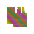

In [37]:
SparseMatrixGrapher(lca.technosphere_matrix).ordered_graph()

Not so interesting - I am sure your inventory data will be much nicer. The problem is that this is an IO matrix, so there is a value at each point, even if it is small, and this graph only shows where values are or aren't zero. For example, here is the same graph for ecoinvent 3.2 (cutoff):

<img src="https://brightwaylca.org/data/ecoinvent-32-cutoff.png">

You can also graph the biosphere and any other LCA matrices.

# Contribution analysis

We can calculate the most important activities and biosphere flows.

In [38]:
from bw2analyzer import ContributionAnalysis

Most important activities

In [39]:
ContributionAnalysis().annotated_top_processes(lca)

[(0.0001396937298226746,
  0.048124613956613126,
  '_66 Electricity, steam and hot water, DK'),
 (6.9991549445978015e-05,
  0.031676664895336694,
  '_75 Electricity, steam and hot water, EU27'),
 (3.9066117403503777e-05,
  1.0040154541123278,
  '121 Membership organisations, DK'),
 (3.1471437466772569e-05,
  0.002722644973875722,
  '_85 Land transport and transport via pipelines, EU27'),
 (2.8255138678408465e-05, 0.002613627974514106, '_77 Transport by ship, DK'),
 (2.7232854080114984e-05, 0.0046124671405131405, '_78 Air transport, DK'),
 (2.4791436039094568e-05,
  0.017374764208137716,
  '_76 Land transport and transport via pipelines, DK'),
 (2.2418509655880271e-05,
  0.023588512910584496,
  '_37 Refined petroleum products and fuels, EU27'),
 (2.2134707126384647e-05, 0.001759677434718698, '_86 Transport by ship, EU27'),
 (1.7328899136656281e-05, 0.0029898970801292748, '_45 Cement, virgin, DK'),
 (1.228528566141261e-05,
  0.0051804826971024159,
  '_54 Recycling of iron basic, EU27'),


Most important biosphere flows

In [40]:
ContributionAnalysis().annotated_top_emissions(lca)

[(0.00063535966277901478, 0.11648357114400353, 'Carbon dioxide, fossil'),
 (3.6634407676716646e-05, 2.0441026840992126e-05, 'Dinitrogen monoxide'),
 (3.6494451165270081e-05, 0.00031931447617440699, 'Methane, fossil'),
 (3.7145115631195734e-06, 0.00044412831943499534, 'Carbon monoxide, fossil'),
 (0.0, 0.0011772196472922202, 'Iron, 46% in ore, 25% in crude ore, in ground'),
 (0.0, 0.016709388649032385, 'Coal, hard, unspecified, in ground'),
 (0.0, 0.14445083580678553, 'Sand, unspecified, in ground'),
 (0.0, 3.473425916667717e-05, 'Ammonia'),
 (0.0, 0.017472626565547385, 'Gas, natural, in ground'),
 (0.0, 0.012410608848276879, 'Carbon dioxide, in air'),
 (0.0,
  0.00012214076264928687,
  'Nickel, 1.98% in silicates, 1.04% in crude ore, in ground'),
 (0.0, 2.5736802426280961e-07, 'Lead, Pb 0.014%, in mixed ore, in ground'),
 (0.0,
  0.00012126299905374413,
  'NMVOC, non-methane volatile organic compounds, unspecified origin'),
 (0.0, 0.023370821808006464, 'Oil, crude, in ground'),
 (0.0, 

# Monte Carlo LCA

Unfortunately, the forwast database doesn't unclude uncertainty. Let's put some in anyways, using the utility function [uncertainify](https://docs.brightwaylca.org/technical/bw2data.html#bw2data.utils.uncertainify).

In [41]:
from bw2data.utils import uncertainify
from stats_arrays import NormalUncertainty

In [42]:
uncertain_db = Database("forwast uncertain +")
uncertain_db.write(
    uncertain_db.relabel_data(
        uncertainify(
            Database("forwast").load(), 
            NormalUncertainty
        ), 
        "forwast uncertain +" 
    )
)

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:05


Title: Writing activities to SQLite3 database:
  Started: 07/15/2016 10:29:56
  Finished: 07/15/2016 10:30:01
  Total time elapsed: 00:00:05
  CPU %: 86.40
  Memory %: 3.03


We can now calculate some Monte Carlo iterations for a random activity.

In [43]:
mc = MonteCarloLCA(demand={uncertain_db.random(): 1}, method=method_key)
mc.load_data()
for x in range(10):
    print(next(mc))

-0.012990105181133098
-0.013614114408092808
-0.011913843459799954
-0.014254416975613252
-0.01387722445682358
-0.013326151175707554
-0.014740736715175558
-0.014968222441644873
-0.013446478696416731
-0.014716687909810464


That't it! Here is your promised kitten:

In [44]:
from IPython.display import Image
import random
dimensions = sorted((int(random.random() * 600 + 200), int(random.random() * 600 + 200)))
Image(url="http://placekitten.com/{}/{}/".format(*dimensions))